In [1]:
from halo_nfw_model import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
M = 6e+13 * u.Msun
z = 0.1 * cu.redshift
h = OneHalo(M, z)
print(f'density at virial radius = {h.call_NFW_density(h.r_vir):.2f} * ρ_crit')
print(f'virial radius = {h.r_vir/h.r_s:.2f} * scale radius')
print(f'halo radius = {distance_to_npixel(h.r_vir*u.Mpc, z):.2f} pixels')

density at virial radius = 5836.90 * ρ_crit
virial radius = 8.15 * scale radius
halo radius = 31.25 pixels


/Users/danny/Desktop/WL/kappa_map/scripts/halo_nfw_model.py:85: RuntimeWarning: invalid value encountered in sqrt
  -(rt(c2-y2)/(1-y2)/(1+c)) + 1/(1-y2)**(3/2) * np.arccosh((y2+c)/(y*(1+c))),
/Users/danny/Desktop/WL/kappa_map/scripts/halo_nfw_model.py:85: RuntimeWarning: invalid value encountered in scalar power
  -(rt(c2-y2)/(1-y2)/(1+c)) + 1/(1-y2)**(3/2) * np.arccosh((y2+c)/(y*(1+c))),
/Users/danny/Desktop/WL/kappa_map/scripts/halo_nfw_model.py:87: RuntimeWarning: invalid value encountered in sqrt
  -(rt(c2-y2)/(1-y2)/(1+c)) - 1/(y2-1)**(3/2) * np.arccos((y2+c)/(y*(1+c))),
/Users/danny/Desktop/WL/kappa_map/scripts/halo_nfw_model.py:87: RuntimeWarning: invalid value encountered in arccos
  -(rt(c2-y2)/(1-y2)/(1+c)) - 1/(y2-1)**(3/2) * np.arccos((y2+c)/(y*(1+c))),
/Users/danny/Desktop/WL/kappa_map/scripts/halo_nfw_model.py:85: RuntimeWarning: invalid value encountered in arccosh
  -(rt(c2-y2)/(1-y2)/(1+c)) + 1/(1-y2)**(3/2) * np.arccosh((y2+c)/(y*(1+c))),
/Users/danny/Desktop/WL/kappa

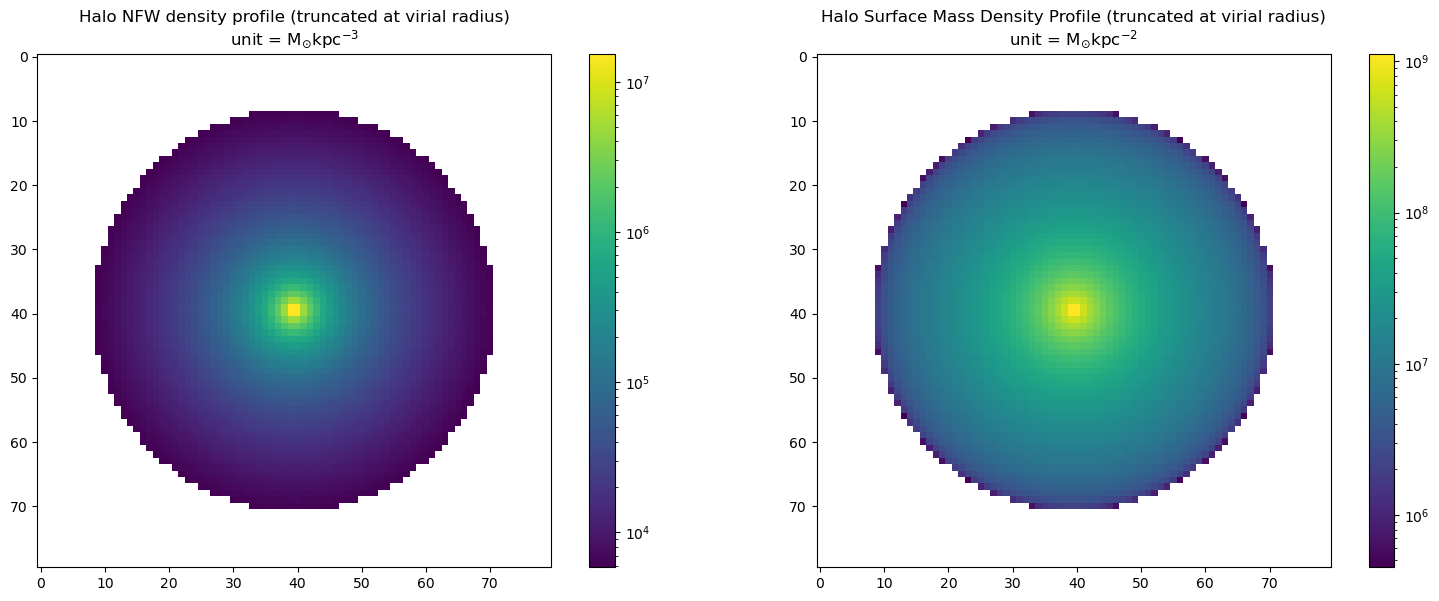

In [3]:
rho_map, Sigma_map = np.zeros((80, 80)), np.zeros((80, 80))
for iy, ix in np.ndindex(rho_map.shape):
    center = np.array((39.5, 39.5))
    point = np.array((iy, ix))
    dis_to_cen = np.linalg.norm(center - point)
    r_proj = npixel_to_distance(dis_to_cen, z).value
    rho_map[iy, ix] = h.call_NFW_density(r=r_proj)
    Sigma_map[iy, ix] = h.call_surface_mass_density(r_proj=r_proj)

fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title('Halo NFW density profile (truncated at virial radius)\nunit = $\\mathrm{M}_{\\odot}\\mathrm{kpc}^{-3}$')
plt.imshow(rho_map, interpolation='None', norm=colors.LogNorm())
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Halo Surface Mass Density Profile (truncated at virial radius)\nunit = $\\mathrm{M}_{\\odot}\\mathrm{kpc}^{-2}$')
plt.imshow(Sigma_map, interpolation='None', norm=colors.LogNorm())
plt.colorbar()
plt.tight_layout()

Text(0, 0.5, '$\\log(\\Sigma(r/r_s))$, unit = $\\mathrm{M}_{\\odot}\\mathrm{kpc}^{-2}$')

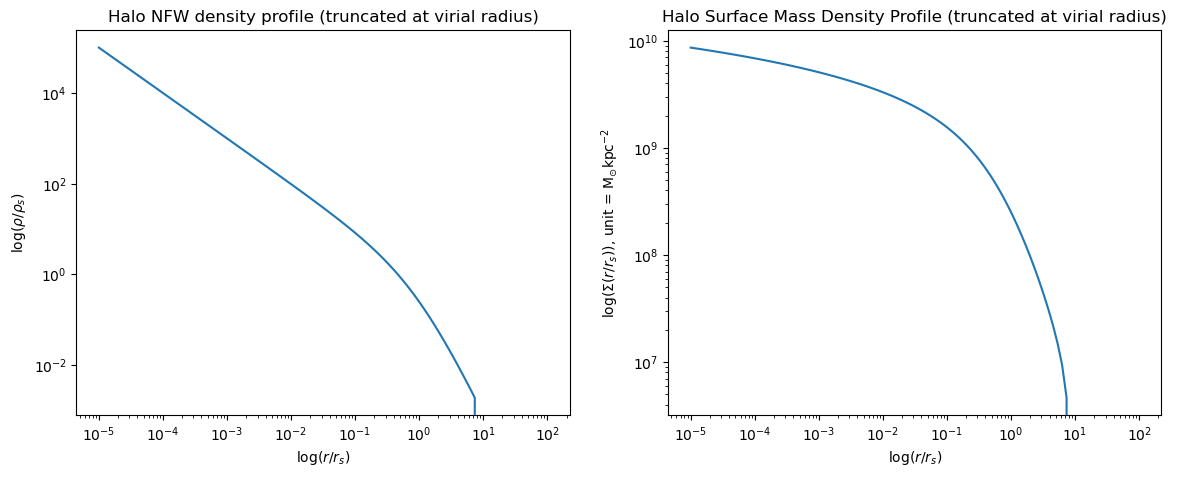

In [4]:
radii = np.logspace(-5, 2, num=100, base=10) * h.r_s
rhos = []
for r in radii:
    rhos.append(h.call_NFW_density(r) / h.delta_s / h.rho_crit)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14, 5))
ax1.loglog((radii/h.r_s), rhos)
ax1.set_title('Halo NFW density profile (truncated at virial radius)')
ax1.set_xlabel(r'$\log(r/r_s)$')
ax1.set_ylabel(r'$\log(\rho/\rho_s)$')


Sigmas = []
for r in radii:
    Sigmas.append(h.call_surface_mass_density(r))

ax2.loglog((radii/h.r_s), Sigmas)
ax2.set_title('Halo Surface Mass Density Profile (truncated at virial radius)')
ax2.set_xlabel(r'$\log(r/r_s)$')
ax2.set_ylabel(r'$\log(\Sigma(r/r_s))$, unit = $\mathrm{M}_{\odot}\mathrm{kpc}^{-2}$')